### Approximating the integral

It is easy to see that as we use large $n$ (i.e., more qubits) and thus larger $b_{\mbox{max}}$, we can approximate the integral better as illustrated below. 

In [1]:
import math

b_max = math.pi / 100  # upper limit of integral # 5
nbit = 10  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2**nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5))**2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

Analytical Result: 0.00032892188007938847
Discretized Result: 0.0003289218016943769


In [2]:
import sys
sys.path.append('../libmitigation')

In [3]:
#Preparing qiskit environment
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import IBMQ
from qiskit import Aer
from scipy import optimize
import sys, time
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt
import pickle
np.random.seed(42)
seed = 42

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  DeprecationWarning,


In [4]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import depolarizing_error
import qiskit.ignis.mitigation as mit
from qiskit.ignis.mitigation.measurement import tensored_meas_cal, TensoredMeasFitter
from lib_grover import *

In [5]:
import importlib
from inv_sgs import InvSGS
from inv_s_sgs import InvSSGS
from inv_lm_sgs import InvLMSGS
from inv_s_lm_sgs import InvSLMSGS
from inv_s_lm0_sgs import InvSLM0SGS
from inv_s_lmk_sgs import InvSLMkSGS
from mooney_etal import MooneyEtal
from sgs_algorithm import sgs_algorithm
from inv_s_scipy import InvSSciPy
from inv_s_scipy_sgs import InvSSciPySGS

## Testing the algorithm with simulators

Let us run the algorithm with simulators

In [6]:
#setting the number of shots and Grover operators.
max_iter = 100
# number_grover_list = [0, 1, 2, 4, 8, 16, 32] # , 64, 128, 256]  # list of number of Grover operators
number_grover_list = [5 * i for i in range(20)]
shots_list = [100] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception(
        'The length of shots_list should be equal to the length of number_grover_list.'
    )

backend = Aer.get_backend('qasm_simulator')

In [7]:
noise_model = NoiseModel()
for qi in range(nbit+1):
    if qi >= 0:
        read_err = ReadoutError([[0.97, 0.03],[0.03,0.97]])
        noise_model.add_readout_error(read_err, [qi])

Finally, we can run the algorithm as below: 

In [8]:
qc_list = create_grover_circuit(number_grover_list, nbit,b_max)  # list of Grover circuits

In [9]:
t1 = time.time()
counts_lists = []
for i in range(max_iter):
    counts_list = run_grover(qc_list, number_grover_list, shots_list, backend, noise_model=noise_model, seed_transpiler=i, seed_simulator=i)  # list of number of grover operators
    counts_lists.append(counts_list)
    with open("p003_q003_piover100.pkl", "wb") as f:
        pickle.dump(counts_lists, f)
    print("iter", i, "finished")
t2 = time.time()
print(t2-t1)

0 th round with 0 oracles
0.08850789070129395 s
1 th round with 5 oracles
0.5117130279541016 s
2 th round with 10 oracles
0.9938156604766846 s
3 th round with 15 oracles
1.4622600078582764 s
4 th round with 20 oracles
2.1063528060913086 s
5 th round with 25 oracles
2.486159086227417 s
6 th round with 30 oracles
3.169743061065674 s
7 th round with 35 oracles
3.6973648071289062 s
8 th round with 40 oracles
4.0465168952941895 s
9 th round with 45 oracles
4.423780202865601 s
10 th round with 50 oracles
5.4656291007995605 s
11 th round with 55 oracles
6.087096214294434 s
12 th round with 60 oracles
6.492870807647705 s
13 th round with 65 oracles
7.8197948932647705 s
14 th round with 70 oracles
7.014848947525024 s
15 th round with 75 oracles
7.302696943283081 s
16 th round with 80 oracles
9.117033958435059 s
17 th round with 85 oracles
8.177154064178467 s
18 th round with 90 oracles
8.71100902557373 s
19 th round with 95 oracles
12.042062997817993 s
iter 0 finished
0 th round with 0 oracles


5.234194993972778 s
9 th round with 45 oracles
5.9337708950042725 s
10 th round with 50 oracles
6.991863965988159 s
11 th round with 55 oracles
7.630385160446167 s
12 th round with 60 oracles
8.330724954605103 s
13 th round with 65 oracles
8.9603590965271 s
14 th round with 70 oracles
9.052756071090698 s
15 th round with 75 oracles
8.76296329498291 s
16 th round with 80 oracles
8.868308067321777 s
17 th round with 85 oracles
9.661496877670288 s
18 th round with 90 oracles
10.286236047744751 s
19 th round with 95 oracles
10.35329008102417 s
iter 8 finished
0 th round with 0 oracles
0.012629032135009766 s
1 th round with 5 oracles
0.5926079750061035 s
2 th round with 10 oracles
1.1301090717315674 s
3 th round with 15 oracles
1.8482701778411865 s
4 th round with 20 oracles
2.5111827850341797 s
5 th round with 25 oracles
2.8639028072357178 s
6 th round with 30 oracles
3.4890410900115967 s
7 th round with 35 oracles
4.060415983200073 s
8 th round with 40 oracles
4.461963176727295 s
9 th rou

9.135462760925293 s
18 th round with 90 oracles
9.826285123825073 s
19 th round with 95 oracles
10.38012170791626 s
iter 16 finished
0 th round with 0 oracles
0.014718055725097656 s
1 th round with 5 oracles
0.6340391635894775 s
2 th round with 10 oracles
1.2710959911346436 s
3 th round with 15 oracles
1.6083040237426758 s
4 th round with 20 oracles
2.139756679534912 s
5 th round with 25 oracles
2.7106029987335205 s
6 th round with 30 oracles
3.2702229022979736 s
7 th round with 35 oracles
3.761690139770508 s
8 th round with 40 oracles
4.467416048049927 s
9 th round with 45 oracles
4.946540117263794 s
10 th round with 50 oracles
5.343138933181763 s
11 th round with 55 oracles
6.265432119369507 s
12 th round with 60 oracles
6.512640714645386 s
13 th round with 65 oracles
7.120707750320435 s
14 th round with 70 oracles
7.872552156448364 s
15 th round with 75 oracles
8.804624080657959 s
16 th round with 80 oracles
8.59803318977356 s
17 th round with 85 oracles
9.30464792251587 s
18 th rou

3.320741891860962 s
7 th round with 35 oracles
3.8881709575653076 s
8 th round with 40 oracles
4.393877029418945 s
9 th round with 45 oracles
4.837005853652954 s
10 th round with 50 oracles
5.64289402961731 s
11 th round with 55 oracles
5.934925079345703 s
12 th round with 60 oracles
6.365645885467529 s
13 th round with 65 oracles
7.0770580768585205 s
14 th round with 70 oracles
7.495708227157593 s
15 th round with 75 oracles
8.426553726196289 s
16 th round with 80 oracles
8.586649656295776 s
17 th round with 85 oracles
9.323815822601318 s
18 th round with 90 oracles
9.810176134109497 s
19 th round with 95 oracles
10.185091972351074 s
iter 25 finished
0 th round with 0 oracles
0.017487049102783203 s
1 th round with 5 oracles
0.5974388122558594 s
2 th round with 10 oracles
1.132978916168213 s
3 th round with 15 oracles
1.6836891174316406 s
4 th round with 20 oracles
2.325015068054199 s
5 th round with 25 oracles
2.6602509021759033 s
6 th round with 30 oracles
3.2177422046661377 s
7 th r

8.167129039764404 s
16 th round with 80 oracles
9.052556991577148 s
17 th round with 85 oracles
9.340246200561523 s
18 th round with 90 oracles
9.585269927978516 s
19 th round with 95 oracles
10.383716821670532 s
iter 33 finished
0 th round with 0 oracles
0.01938009262084961 s
1 th round with 5 oracles
0.6048221588134766 s
2 th round with 10 oracles
1.137695074081421 s
3 th round with 15 oracles
1.6751210689544678 s
4 th round with 20 oracles
2.1537861824035645 s
5 th round with 25 oracles
2.7767348289489746 s
6 th round with 30 oracles
3.3077762126922607 s
7 th round with 35 oracles
3.8840067386627197 s
8 th round with 40 oracles
4.228610992431641 s
9 th round with 45 oracles
5.1655433177948 s
10 th round with 50 oracles
5.568203926086426 s
11 th round with 55 oracles
6.047278881072998 s
12 th round with 60 oracles
6.435674667358398 s
13 th round with 65 oracles
7.0990149974823 s
14 th round with 70 oracles
7.561986923217773 s
15 th round with 75 oracles
8.239322662353516 s
16 th roun

2.1382319927215576 s
5 th round with 25 oracles
2.652829885482788 s
6 th round with 30 oracles
3.2890639305114746 s
7 th round with 35 oracles
3.9007749557495117 s
8 th round with 40 oracles
4.332759857177734 s
9 th round with 45 oracles
4.743504047393799 s
10 th round with 50 oracles
5.528130054473877 s
11 th round with 55 oracles
5.989035129547119 s
12 th round with 60 oracles
6.587764024734497 s
13 th round with 65 oracles
6.889892816543579 s
14 th round with 70 oracles
7.467710018157959 s
15 th round with 75 oracles
7.993937969207764 s
16 th round with 80 oracles
8.825819969177246 s
17 th round with 85 oracles
9.067306995391846 s
18 th round with 90 oracles
9.918776750564575 s
19 th round with 95 oracles
10.22295093536377 s
iter 42 finished
0 th round with 0 oracles
0.020545005798339844 s
1 th round with 5 oracles
0.5835790634155273 s
2 th round with 10 oracles
1.2347478866577148 s
3 th round with 15 oracles
1.6864759922027588 s
4 th round with 20 oracles
2.1755149364471436 s
5 th 

7.074582099914551 s
14 th round with 70 oracles
7.441227912902832 s
15 th round with 75 oracles
8.125422716140747 s
16 th round with 80 oracles
8.758211851119995 s
17 th round with 85 oracles
9.092097043991089 s
18 th round with 90 oracles
9.89223313331604 s
19 th round with 95 oracles
10.340387105941772 s
iter 50 finished
0 th round with 0 oracles
0.024042844772338867 s
1 th round with 5 oracles
0.6079201698303223 s
2 th round with 10 oracles
1.1623430252075195 s
3 th round with 15 oracles
1.8657379150390625 s
4 th round with 20 oracles
2.152247905731201 s
5 th round with 25 oracles
2.7126080989837646 s
6 th round with 30 oracles
3.299994707107544 s
7 th round with 35 oracles
3.8516860008239746 s
8 th round with 40 oracles
4.383001804351807 s
9 th round with 45 oracles
4.865309953689575 s
10 th round with 50 oracles
5.43777322769165 s
11 th round with 55 oracles
6.025259017944336 s
12 th round with 60 oracles
6.502439975738525 s
13 th round with 65 oracles
6.896545171737671 s
14 th ro

1.3566970825195312 s
3 th round with 15 oracles
2.116415023803711 s
4 th round with 20 oracles
2.598388195037842 s
5 th round with 25 oracles
3.2347099781036377 s
6 th round with 30 oracles
3.891747236251831 s
7 th round with 35 oracles
4.508000135421753 s
8 th round with 40 oracles
5.305645227432251 s
9 th round with 45 oracles
5.794156789779663 s
10 th round with 50 oracles
6.339241981506348 s
11 th round with 55 oracles
7.351585149765015 s
12 th round with 60 oracles
8.073706150054932 s
13 th round with 65 oracles
8.443056344985962 s
14 th round with 70 oracles
9.23971676826477 s
15 th round with 75 oracles
9.915812015533447 s
16 th round with 80 oracles
10.980946063995361 s
17 th round with 85 oracles
11.532989025115967 s
18 th round with 90 oracles
12.569782972335815 s
19 th round with 95 oracles
12.309134006500244 s
iter 59 finished
0 th round with 0 oracles
0.03074193000793457 s
1 th round with 5 oracles
0.7059187889099121 s
2 th round with 10 oracles
1.3566620349884033 s
3 th r

5.874881982803345 s
12 th round with 60 oracles
6.185726881027222 s
13 th round with 65 oracles
6.6724159717559814 s
14 th round with 70 oracles
7.549971342086792 s
15 th round with 75 oracles
7.707042932510376 s
16 th round with 80 oracles
8.344761848449707 s
17 th round with 85 oracles
8.86320424079895 s
18 th round with 90 oracles
9.435544729232788 s
19 th round with 95 oracles
9.900713920593262 s
iter 67 finished
0 th round with 0 oracles
0.0268857479095459 s
1 th round with 5 oracles
0.5685069561004639 s
2 th round with 10 oracles
1.1604580879211426 s
3 th round with 15 oracles
1.6191389560699463 s
4 th round with 20 oracles
2.148289918899536 s
5 th round with 25 oracles
2.6184303760528564 s
6 th round with 30 oracles
3.2177228927612305 s
7 th round with 35 oracles
3.952543020248413 s
8 th round with 40 oracles
4.290241718292236 s
9 th round with 45 oracles
4.663420915603638 s
10 th round with 50 oracles
5.309183835983276 s
11 th round with 55 oracles
5.795958042144775 s
12 th rou

0.5869019031524658 s
2 th round with 10 oracles
1.0701911449432373 s
3 th round with 15 oracles
1.6037747859954834 s
4 th round with 20 oracles
2.2114620208740234 s
5 th round with 25 oracles
2.726947784423828 s
6 th round with 30 oracles
3.482161045074463 s
7 th round with 35 oracles
3.7838869094848633 s
8 th round with 40 oracles
4.0930681228637695 s
9 th round with 45 oracles
4.698428153991699 s
10 th round with 50 oracles
5.51546311378479 s
11 th round with 55 oracles
5.681457042694092 s
12 th round with 60 oracles
6.508928060531616 s
13 th round with 65 oracles
6.749027967453003 s
14 th round with 70 oracles
7.496325731277466 s
15 th round with 75 oracles
7.9373509883880615 s
16 th round with 80 oracles
8.78845500946045 s
17 th round with 85 oracles
9.032840013504028 s
18 th round with 90 oracles
9.671634912490845 s
19 th round with 95 oracles
10.128477096557617 s
iter 76 finished
0 th round with 0 oracles
0.02786421775817871 s
1 th round with 5 oracles
0.728783130645752 s
2 th ro

5.822792291641235 s
11 th round with 55 oracles
5.9646008014678955 s
12 th round with 60 oracles
6.848806858062744 s
13 th round with 65 oracles
7.222541093826294 s
14 th round with 70 oracles
7.676408052444458 s
15 th round with 75 oracles
8.40479302406311 s
16 th round with 80 oracles
9.342226028442383 s
17 th round with 85 oracles
9.394763946533203 s
18 th round with 90 oracles
10.09955096244812 s
19 th round with 95 oracles
10.549612998962402 s
iter 84 finished
0 th round with 0 oracles
0.03420066833496094 s
1 th round with 5 oracles
0.6279501914978027 s
2 th round with 10 oracles
1.177781105041504 s
3 th round with 15 oracles
1.8617610931396484 s
4 th round with 20 oracles
2.181198835372925 s
5 th round with 25 oracles
2.895904064178467 s
6 th round with 30 oracles
3.351398229598999 s
7 th round with 35 oracles
3.974407196044922 s
8 th round with 40 oracles
4.540212869644165 s
9 th round with 45 oracles
5.0553929805755615 s
10 th round with 50 oracles
5.648467063903809 s
11 th rou

10.759752035140991 s
iter 92 finished
0 th round with 0 oracles
0.04813694953918457 s
1 th round with 5 oracles
0.7492349147796631 s
2 th round with 10 oracles
1.2065517902374268 s
3 th round with 15 oracles
1.8976621627807617 s
4 th round with 20 oracles
2.309089183807373 s
5 th round with 25 oracles
2.469536066055298 s
6 th round with 30 oracles
2.8891358375549316 s
7 th round with 35 oracles
3.2088918685913086 s
8 th round with 40 oracles
3.950486898422241 s
9 th round with 45 oracles
4.244329929351807 s
10 th round with 50 oracles
4.842610836029053 s
11 th round with 55 oracles
5.389108896255493 s
12 th round with 60 oracles
5.750955104827881 s
13 th round with 65 oracles
6.040171146392822 s
14 th round with 70 oracles
6.739279747009277 s
15 th round with 75 oracles
6.860318899154663 s
16 th round with 80 oracles
7.560231924057007 s
17 th round with 85 oracles
8.038429975509644 s
18 th round with 90 oracles
8.446737051010132 s
19 th round with 95 oracles
9.126446962356567 s
iter 93

In [10]:
with open("p003_q003_piover100.pkl", "rb") as f:
    counts_lists = pickle.load(f)

In [11]:
hit_lists = []
for i in range(max_iter):
    hit_list = make_hit_list(counts_lists[i])
    # print(hit_list)
    hit_lists.append(hit_list)
    print("iter", i, "finished")

iter 0 finished
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
iter 11 finished
iter 12 finished
iter 13 finished
iter 14 finished
iter 15 finished
iter 16 finished
iter 17 finished
iter 18 finished
iter 19 finished
iter 20 finished
iter 21 finished
iter 22 finished
iter 23 finished
iter 24 finished
iter 25 finished
iter 26 finished
iter 27 finished
iter 28 finished
iter 29 finished
iter 30 finished
iter 31 finished
iter 32 finished
iter 33 finished
iter 34 finished
iter 35 finished
iter 36 finished
iter 37 finished
iter 38 finished
iter 39 finished
iter 40 finished
iter 41 finished
iter 42 finished
iter 43 finished
iter 44 finished
iter 45 finished
iter 46 finished
iter 47 finished
iter 48 finished
iter 49 finished
iter 50 finished
iter 51 finished
iter 52 finished
iter 53 finished
iter 54 finished
iter 55 finished
iter 56 finished
iter 57 finished
iter 58 finished
iter 59

In [12]:
shots = 8192
qr = QuantumRegister(nbit+1)
mit_pattern = [[i] for i in range(nbit+1)]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
job = execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=shots, noise_model=noise_model, seed_transpiler=seed, seed_simulator=seed)
cal_results = job.result()
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)

In [13]:
ts_sgs_list = []
meas_filter = InvSGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_sgs = []
    mit_counts_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts)
        t2 = time.time()
        ts_sgs.append(t2 - t1)
        mit_counts_list.append(x_tilde)
    mit_hit_list = make_hit_list(mit_counts_list)
    mit_hit_lists.append(mit_hit_list)
    ts_sgs_list.append(ts_sgs)
    print("iter", i, "finished")

strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict 

sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 2 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS al

sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 5 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS a

sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 8 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS a

sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999981
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999981
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999981
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of

sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 31 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS a

sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 34 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS 

sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 37 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS 

sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999981
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999981
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999981
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of

sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 60 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS a

sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 63 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS 

sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 66 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS 

sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999981
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999981
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999981
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of

sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000033
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999997
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 89 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000002
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000022
number of positive values:  1024
main process: Done!
strict inverse + SGS a

sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 92 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999993
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
strict inverse + SGS 

sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999986
number of positive values:  1024
main process: Done!
iter 95 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1024
main process: Done!
strict inverse + SGS 

sum of mitigated probability vector x: 0.9999999999999989
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999964
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000007
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999992
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999939
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999996
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of 

In [14]:
ts_lm0_sgs_list = []
meas_filter = InvSLM0SGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_S_lm_0_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_lm0_sgs = []
    x_tilde_S_lm_0_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts)
        t2 = time.time()
        ts_lm0_sgs.append(t2 - t1)
        x_tilde_S_lm_0_list.append(x_tilde)
    mit_hit_S_lm_0_list = make_hit_list(x_tilde_S_lm_0_list)
    mit_hit_S_lm_0_lists.append(mit_hit_S_lm_0_list)
    ts_lm0_sgs_list.append(ts_lm0_sgs)
    print("iter", i, "finished")

Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.007992029190063477 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.009536027908325195 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.00977778434753418 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.011987924575805664 s
numb

sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.01392817497253418 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.011147022247314453 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.009372949600219727 s
number of positive values:  10
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_hat_s: 1.079236845666242
0.009063243865966797 s
number of positive values:  8
main process: Done!
Restriction to la

sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.009408950805664062 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.009807109832763672 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.010584115982055664 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.015516996383666992 s
number of positive values:  15
main process: Done!
Restriction t

sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.012465715408325195 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.00911092758178711 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.008821964263916016 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.010030031204223633 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mi

sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.010651111602783203 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.011938810348510742 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.01350712776184082 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.013870000839233398 s
number of positive values:  17
main process: Done!
Restriction to lab

sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.009287834167480469 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.010960817337036133 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.01094198226928711 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.012650012969970703 s
number of positive values:  17
main process: Done!
Restriction to lab

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.016414403915405273 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.012494087219238281 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.010065078735351562 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.008975744247436523 s
number of positive values:  10
main process: Done!
Restriction t

sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.009566783905029297 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.009132146835327148 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.009115219116210938 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.009519815444946289 s
number of positive values:  16
main process: Done!
Restriction t

sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.010673761367797852 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.010124921798706055 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.01097416877746582 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.014559030532836914 s
number of positive values:  15
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.010549068450927734 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.011367082595825195 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.011518239974975586 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.01311802864074707 s
number of positive values:  16
main process: Done!
Restriction to

main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.011873006820678711 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.012830972671508789 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.012455940246582031 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.0122

number of positive values:  11
main process: Done!
iter 19 finished
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.008138656616210938 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.008639097213745117 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.010004997253417969 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated pro

sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_hat_s: 1.0831646715890957
0.009028911590576172 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.009741067886352539 s
number of positive values:  11
main process: Done!
iter 21 finished
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.008279085159301758 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.00952601432800293 s
number of positive values:  9
main process: Done!
R

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.016997098922729492 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.013915061950683594 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.010415792465209961 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.010030984878540039 s
number of positive values:  10
main process: Done!
Restriction t

sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.009216070175170898 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.008622884750366211 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.008725166320800781 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.008653879165649414 s
number of positive values:  15
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.011396169662475586 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.00985097885131836 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.009163141250610352 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.009820222854614258 s
number of positive values:  15
main process: Done!
Restriction to 

sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.011015176773071289 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.011707067489624023 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.013116121292114258 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.016435861587524414 s
number of positive values:  17
main process: Done!
Restriction to la

sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.017215967178344727 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.01788020133972168 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.011574029922485352 s
number of positive values:  10
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_hat_s: 1.079236845666242
0.012070178985595703 s
number of positive values:  8
main process: Done!
Restriction to la

sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.010203838348388672 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.010125875473022461 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.011401176452636719 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.015532970428466797 s
number of positive values:  15
main process: Done!
Restriction t

sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.0099639892578125 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.009366035461425781 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.012438774108886719 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.013271808624267578 s
number of positive values:  16
main process: Done!
Restriction to 

sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.014625072479248047 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.010078907012939453 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.011481761932373047 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.009269952774047852 s
number of positive values:  15
main process: Done!
Restriction to 

sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.01297307014465332 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.013706684112548828 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.014539957046508789 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.010617256164550781 s
number of positive values:  15
main process: Done!
Restriction to lab

sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.010995149612426758 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.013325929641723633 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.01332998275756836 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.013298749923706055 s
number of positive values:  17
main process: Done!
Restriction to lab

sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.012259244918823242 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.009368658065795898 s
number of positive values:  10
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_hat_s: 1.079236845666242
0.008543014526367188 s
number of positive values:  8
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_hat_s: 1.0831646715890957
0.008123159408569336 s
number of positive values:  9
main process: Done!
Restriction to lab

sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.010612010955810547 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.00910806655883789 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.010268926620483398 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.011483907699584961 s
number of positive values:  16
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.009838104248046875 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.009307861328125 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.010103940963745117 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.011709213256835938 s
number of positive values:  16
main process: Done!
Restriction to l

sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.009687185287475586 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.00913691520690918 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.008803129196166992 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.011501789093017578 s
number of positive values:  16
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.013549089431762695 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.015856266021728516 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.015175104141235352 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.014066934585571289 s
number of positive values:  15
main process: Done!
Restriction to la

sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_hat_s: 1.0831646715890957
0.00970005989074707 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.01071023941040039 s
number of positive values:  11
main process: Done!
iter 50 finished
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.008321046829223633 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.009512901306152344 s
number of positive values:  9
main process: Done!
Re

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.01710796356201172 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.015173912048339844 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.012269020080566406 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.01147603988647461 s
number of positive values:  10
main process: Done!
Restriction to 

sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.016978979110717773 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.009016752243041992 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.010244131088256836 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.00932621955871582 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mi

sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.011558055877685547 s
number of positive values:  11
main process: Done!
iter 55 finished
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.009258747100830078 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.012163162231445312 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.01423788070678711 s
number of positive values:  11
main process: Done!

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.015810012817382812 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.015131235122680664 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.012835979461669922 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.011684179306030273 s
number of positive values:  10
main process: Done!
Restriction t

sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.012470006942749023 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.009537220001220703 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.009675025939941406 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.012884140014648438 s
number of positive values:  15
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_hat_s: 1.0831646715890957
0.009741067886352539 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.011553049087524414 s
number of positive values:  11
main process: Done!
iter 60 finished
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.008816242218017578 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.012061119079589844 s
number of positive values:  9
main process: Done!


sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.01721811294555664 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.014045000076293945 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.012207984924316406 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.012056827545166016 s
number of positive values:  10
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.011822223663330078 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.009749889373779297 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.009927988052368164 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.009550809860229492 s
number of positive values:  15
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.011250972747802734 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.013509035110473633 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.015122175216674805 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.014865875244140625 s
number of positive values:  17
main process: Done!
Restriction to la

sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.01784491539001465 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.01371622085571289 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.011827945709228516 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.011306047439575195 s
number of positive values:  10
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mit

sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.01609325408935547 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.011509895324707031 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.012204885482788086 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.011843681335449219 s
number of positive values:  15
main process: Done!
Restriction to l

sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.010978937149047852 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.011259794235229492 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.012183904647827148 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.017699003219604492 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of m

sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.01142120361328125 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.011465311050415039 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.01082921028137207 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.011934995651245117 s
number of positive values:  15
main process: Done!
Restriction to l

sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.011888980865478516 s
number of positive values:  11
main process: Done!
iter 74 finished
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.008409261703491211 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.009822845458984375 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.010434865951538086 s
number of positive values:  11
main process: Done

sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.015498876571655273 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.013406991958618164 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.01289987564086914 s
number of positive values:  10
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_hat_s: 1.079236845666242
0.010432004928588867 s
number of positive values:  8
main process: Done!
Restriction to la

sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.010976076126098633 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.012432098388671875 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.011795997619628906 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.011539220809936523 s
number of positive values:  15
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.013900995254516602 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.015050888061523438 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.01570415496826172 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.01177215576171875 s
number of positive values:  15
main process: Done!
Restriction to labe

sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.012175798416137695 s
number of positive values:  11
main process: Done!
iter 81 finished
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.010495185852050781 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.011766910552978516 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.011990070343017578 s
number of positive values:  11
main process: Done

sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.012579917907714844 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.01855301856994629 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.01592707633972168 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.013357162475585938 s
number of positive values:  12
main process: Done!
Restriction to 

sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.010777950286865234 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_hat_s: 1.1435911685116689
0.010222196578979492 s
number of positive values:  14
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_hat_s: 1.1244408049814776
0.010402917861938477 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.01011800765991211 s
number of positive values:  15
main process: Done!
Restriction to 

sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.013441085815429688 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.013745784759521484 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_hat_s: 1.1503695200291892
0.014893770217895508 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_hat_s: 1.1609315411244656
0.012012004852294922 s
number of positive values:  15
main process: Done!
Restriction to la

sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_hat_s: 1.1414911813118065
0.009443998336791992 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.009090662002563477 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.010170936584472656 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.012188911437988281 s
number of positive values:  17
main process: Done!
Restriction to la

sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.012313127517700195 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.009309053421020508 s
number of positive values:  10
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_hat_s: 1.079236845666242
0.008275985717773438 s
number of positive values:  8
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_hat_s: 1.0831646715890957
0.008467912673950195 s
number of positive values:  9
main process: Done!
Restriction to lab

sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.012849807739257812 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.014703750610351562 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.01256704330444336 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.012140035629272461 s
number of positive values:  12
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_hat_s: 1.1500127364979855
0.010367155075073242 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_hat_s: 1.1305374637780923
0.011972188949584961 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_hat_s: 1.1617341881242353
0.011172056198120117 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.013937950134277344 s
number of positive values:  16
main process: Done!
Restriction t

sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_hat_s: 1.0818860011249682
0.011133193969726562 s
number of positive values:  9
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_hat_s: 1.0884382809277062
0.013492107391357422 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_hat_s: 1.14536697780422
0.01698613166809082 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_hat_s: 1.1593683501008911
0.01849508285522461 s
number of positive values:  16
main process: Done!
Restriction to label

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.015720129013061523 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.01332402229309082 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.011399030685424805 s
number of positive values:  12
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_hat_s: 1.0853501018214364
0.010647058486938477 s
number of positive values:  10
main process: Done!
Restriction to

sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_hat_s: 1.1680682697554048
0.012642145156860352 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_hat_s: 1.1491492313170315
0.015051126480102539 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_hat_s: 1.1537253658188134
0.014476776123046875 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_hat_s: 1.0914773303796452
0.011983871459960938 s
number of positive values:  12
main process: Done!
Restriction t

In [15]:
ts_mooney100_list = []
meas_filter = MooneyEtal(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_mooney100_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_mooney100 = []
    x_tilde_mooney_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts, threshold=1/100)
        t2 = time.time()
        ts_mooney100.append(t2 - t1)
        x_tilde_mooney_list.append(x_tilde)
    mit_hit_mooney100_list = make_hit_list(x_tilde_mooney_list)
    mit_hit_mooney100_lists.append(mit_hit_mooney100_list)
    ts_mooney100_list.append(ts_mooney100)
    print("iter", i, "finished")

The heuristcs by Mooney et al. + SGS algorithm
{640: 0.014019891648542502, 384: 0.012273549519796033, 144: 0.014058714379851251, 10: 0.012461216231275956, 8: -0.018503636924787924, 513: 0.014011091395830046, 256: 0.02496328782003788, 4: -0.01706643072802662, 2: 0.03957806024518638, 1024: -0.016986462139084064, 1282: 0.014072930471662961, 0: 1.0337265304591423}
sum of counts: 1.1266087423794267
0.0019371509552001953 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.018323303494402043, 128: -0.017995199905602947, 1536: 0.013112441772822713, 1: -0.01636855536798172, 516: 0.01242878300136449, 260: 0.012926101630222949, 0: 1.004186745518998, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.054353739626916
0.0013828277587890625 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.01177

{1280: 0.06087687330033931, 1028: 0.03292130754274486, 1026: 0.04738274762582516, 1024: 0.7719415164072332, 0: 0.04771338736966296, 1536: 0.11390028147857909}
sum of counts: 1.0747361137243845
0.001811981201171875 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1280: 0.03610224964081758, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1088: 0.02227380112702312, 1536: 0.08987151298126116, 0: 0.19136729076738293, 1024: 0.6563744264466262}
sum of counts: 1.096988026572384
0.0011777877807617188 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1041: 0.014039298058422465, 1284: 0.012606844306500872, 1028: 0.03633314326730519, 1026: 0.03700075476910721, 1536: 0.07621787026916363, 0: 0.28936021450585336, 1024: 0.6426125802061213}
sum of counts: 1.122181796778304
0.0015230178833007812 s
number of positive values:  8
main process: Done

0.0022547245025634766 s
number of positive values:  12
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012119012602059111, 1536: 0.018187114217832638, 260: 0.012641948719672365, 0: 0.6739391466050907, 1282: 0.012687506824349692, 2: 0.02153460009718156, 1024: 0.2861286168634756, 1026: 0.018094282280305934, 4: 0.03511465873920033, 1280: 0.018601507315476967}
sum of counts: 1.1230876923230675
0.0015311241149902344 s
number of positive values:  11
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016552061013411376, 128: -0.0162151372011972, 1536: 0.011325734897348897, 1: -0.014677756996097269, 516: 0.012375044265626363, 260: 0.012876806997154266, 0: 0.9466796524728973, 2: 0.042462856398469716, 1024: 0.05506775832173665, 256: -0.014325863725988366, 4: 0.027114422287028303}
sum of counts: 1.0461314567035673
0.03497171401977539 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + S

{16: -0.01876961187325269, 128: -0.018443730758031178, 1: -0.01679125496095283, 516: 0.012442323805791985, 260: 0.012938522632997575, 0: 1.0182533549121275, 2: 0.05450456119987659, 256: -0.016379334819446995, 4: 0.02501213453785307}
sum of counts: 1.052766964676963
0.0022382736206054688 s
number of positive values:  5
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.018323303494402043, 128: -0.017995199905602947, 1: -0.01636855536798172, 516: 0.01242878300136449, 1024: 0.012023722095746914, 260: 0.012926101630222949, 0: 1.0037630195993341, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.0528412940301766
0.0013580322265625 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.012388585070053857, 260: 0.012889227999928895, 0: 0.9611699877856905, 2: 0.042049886

main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.06087687330033931, 1028: 0.03292130754274486, 1026: 0.04738274762582516, 1024: 0.7719415164072332, 0: 0.04771338736966296, 1536: 0.11390028147857909}
sum of counts: 1.0747361137243845
0.0010581016540527344 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1280: 0.03610224964081758, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1088: 0.02227380112702312, 1536: 0.08987151298126116, 0: 0.19136729076738293, 1024: 0.6563744264466262}
sum of counts: 1.096988026572384
0.0013728141784667969 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1041: 0.014039298058422465, 1284: 0.012606844306500872, 1028: 0.03633314326730519, 1026: 0.03700075476910721, 1536: 0.07621787026916363, 0: 0.28936021450585336, 1024: 0.6426125802061213}
sum of counts: 1.122181796778304
0.00

sum of counts: 1.0979769275124265
0.004147052764892578 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1056: 0.020432526902302614, 1280: 0.03609149195687408, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1536: 0.08985978545031904, 0: 0.20543475046141105, 1024: 0.6563181245932224}
sum of counts: 1.109135424973402
0.0012061595916748047 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1056: 0.018190998749904926, 1280: 0.09020518133004223, 1028: 0.034189681577808995, 1026: 0.04862072323258833, 1024: 0.7284777412913858, 0: 0.09118418146576268, 1536: 0.08725027424088029}
sum of counts: 1.098118781888373
0.00115203857421875 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.04643012486786673, 1026: 0.04697008909023742, 1088: 0.018530435371067817, 1024: 0.7865063327529799, 1536: 0.14147514244197767, 10

sum of counts: 1.0440407191490704
0.00409388542175293 s
number of positive values:  7
main process: Done!
iter 10 finished
The heuristcs by Mooney et al. + SGS algorithm
{640: 0.014019891648542502, 384: 0.012273549519796033, 144: 0.014058714379851251, 10: 0.012461216231275956, 8: -0.018503636924787924, 513: 0.014011091395830046, 256: 0.02496328782003788, 4: -0.01706643072802662, 2: 0.03957806024518638, 1024: -0.016986462139084064, 1282: 0.014072930471662961, 0: 1.0337265304591423}
sum of counts: 1.1266087423794267
0.0019121170043945312 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.018323303494402043, 128: -0.017995199905602947, 1536: 0.013112441772822713, 1: -0.01636855536798172, 516: 0.01242878300136449, 260: 0.012926101630222949, 0: 1.004186745518998, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.054353739626916
0.0022492408752441406 s
number of positive values:  6
main process:

{1056: 0.018190998749904926, 1280: 0.09020518133004223, 1028: 0.034189681577808995, 1026: 0.04862072323258833, 1024: 0.7284777412913858, 0: 0.09118418146576268, 1536: 0.08725027424088029}
sum of counts: 1.098118781888373
0.002413034439086914 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.04643012486786673, 1026: 0.04697008909023742, 1088: 0.018530435371067817, 1024: 0.7865063327529799, 1536: 0.14147514244197767, 1028: 0.03249851619772349}
sum of counts: 1.072410640721853
0.0012669563293457031 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1152: 0.016853670916282776, 1280: 0.04643082509822053, 1026: 0.04695806185653687, 1088: 0.018109638393756226, 1024: 0.7869052327369965, 1536: 0.14147590580081812, 1028: 0.03248619363590881}
sum of counts: 1.08921952843852
0.0010828971862792969 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorith

{16: -0.018323303494402043, 128: -0.017995199905602947, 1536: 0.013112441772822713, 1: -0.01636855536798172, 516: 0.01242878300136449, 260: 0.012926101630222949, 0: 1.004186745518998, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.054353739626916
0.0027570724487304688 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.012388585070053857, 260: 0.012889227999928895, 0: 0.9611699877856905, 2: 0.04204988653995811, 1024: 0.040577423008943535, 256: -0.01473914910822477, 4: 0.026691311974564435}
sum of counts: 1.0440407191490704
0.0017242431640625 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012173175819769093, 1154: 0.013456740997247725, 260: 0.01269163273077087, 0: 0.7310535537030424, 2: 0.019860

number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013684611606103457, 1041: 0.014039298058422465, 516: 0.012406862657284707, 1026: 0.02992003019709112, 1057: 0.014055211620453423, 0: 0.5451659192165882, 1024: 0.400844711697593, 4: 0.03927781234624497, 1536: 0.056198186165850005}
sum of counts: 1.1255926435656314
0.0017740726470947266 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 1284: 0.012569609389400759, 1026: 0.038238730375870396, 1536: 0.06354378898024314, 1028: 0.037601517302369304, 0: 0.3320541676327001, 1024: 0.5999298157734202}
sum of counts: 1.0979769275124265
0.001402139663696289 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1056: 0.020432526902302614, 1280: 0.03609149195687408, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1536: 0.08985978545031904, 0:

main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013275480208529002, 1041: 0.014039298058422465, 2: 0.012517981376475825, 4: 0.012292246947585636, 32: 0.012077989440945998, 516: 0.013257771359039435, 1026: 0.02786862457662971, 1536: 0.05442840688302468, 1057: 0.014055211620453423, 1028: 0.013175612079797746, 0: 0.48820365904645924, 1024: 0.4578069718677219}
sum of counts: 1.1329992534650852
0.0018799304962158203 s
number of positive values:  12
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012119012602059111, 1536: 0.018187114217832638, 260: 0.012641948719672365, 0: 0.6739391466050907, 1282: 0.012687506824349692, 2: 0.02153460009718156, 1024: 0.2861286168634756, 1026: 0.018094282280305934, 4: 0.03511465873920033, 1280: 0.018601507315476967}
sum of counts: 1.1230876923230675
0.0018923282623291016 s
number of positive values:  11
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.0

{1041: 0.014039298058422465, 516: 0.012119012602059111, 1536: 0.018187114217832638, 260: 0.012641948719672365, 0: 0.6739391466050907, 1282: 0.012687506824349692, 2: 0.02153460009718156, 1024: 0.2861286168634756, 1026: 0.018094282280305934, 4: 0.03511465873920033, 1280: 0.018601507315476967}
sum of counts: 1.1230876923230675
0.002063751220703125 s
number of positive values:  11
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016552061013411376, 128: -0.0162151372011972, 1536: 0.011325734897348897, 1: -0.014677756996097269, 516: 0.012375044265626363, 260: 0.012876806997154266, 0: 0.9466796524728973, 2: 0.042462856398469716, 1024: 0.05506775832173665, 256: -0.014325863725988366, 4: 0.027114422287028303}
sum of counts: 1.0461314567035673
0.001432180404663086 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.017876995115551398, 1024: 0.012051000588429114, 128: -0.01754666905317473, 1536: 0.012662236757059984

0.0017979145050048828 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012173175819769093, 1154: 0.013456740997247725, 260: 0.01269163273077087, 0: 0.7310535537030424, 2: 0.019860815034614603, 1024: 0.25707571904821025, 1026: 0.018891592251972775, 4: 0.03342221748934489}
sum of counts: 1.1126647451333949
0.0018100738525390625 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013684611606103457, 1041: 0.014039298058422465, 516: 0.012406862657284707, 1026: 0.02992003019709112, 1057: 0.014055211620453423, 0: 0.5451659192165882, 1024: 0.400844711697593, 4: 0.03927781234624497, 1536: 0.056198186165850005}
sum of counts: 1.1255926435656314
0.001744985580444336 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 1284: 0.012569609389400759, 1026: 0.038238730375870396, 1536: 0.0

{513: 0.014011091395830046, 1056: 0.020432526902302614, 1280: 0.03609149195687408, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1536: 0.08985978545031904, 0: 0.20543475046141105, 1024: 0.6563181245932224}
sum of counts: 1.109135424973402
0.0018229484558105469 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1056: 0.018190998749904926, 1280: 0.09020518133004223, 1028: 0.034189681577808995, 1026: 0.04862072323258833, 1024: 0.7284777412913858, 0: 0.09118418146576268, 1536: 0.08725027424088029}
sum of counts: 1.098118781888373
0.0011048316955566406 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.04643012486786673, 1026: 0.04697008909023742, 1088: 0.018530435371067817, 1024: 0.7865063327529799, 1536: 0.14147514244197767, 1028: 0.03249851619772349}
sum of counts: 1.072410640721853
0.001299142837524414 s
number of positive values:  6
main process: Done!
The heuristcs by Moon

{1284: 0.013275480208529002, 1041: 0.014039298058422465, 2: 0.012517981376475825, 4: 0.012292246947585636, 32: 0.012077989440945998, 516: 0.013257771359039435, 1026: 0.02786862457662971, 1536: 0.05442840688302468, 1057: 0.014055211620453423, 1028: 0.013175612079797746, 0: 0.48820365904645924, 1024: 0.4578069718677219}
sum of counts: 1.1329992534650852
0.0023491382598876953 s
number of positive values:  12
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012119012602059111, 1536: 0.018187114217832638, 260: 0.012641948719672365, 0: 0.6739391466050907, 1282: 0.012687506824349692, 2: 0.02153460009718156, 1024: 0.2861286168634756, 1026: 0.018094282280305934, 4: 0.03511465873920033, 1280: 0.018601507315476967}
sum of counts: 1.1230876923230675
0.0016069412231445312 s
number of positive values:  11
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016552061013411376, 128: -0.0162151372011972, 1536: 0.01132573489734

number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1041: 0.014039298058422465, 1284: 0.012606844306500872, 1028: 0.03633314326730519, 1026: 0.03700075476910721, 1536: 0.07621787026916363, 0: 0.28936021450585336, 1024: 0.6426125802061213}
sum of counts: 1.122181796778304
0.00203704833984375 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013275480208529002, 1041: 0.014039298058422465, 2: 0.012517981376475825, 4: 0.012292246947585636, 32: 0.012077989440945998, 516: 0.013257771359039435, 1026: 0.02786862457662971, 1536: 0.05442840688302468, 1057: 0.014055211620453423, 1028: 0.013175612079797746, 0: 0.48820365904645924, 1024: 0.4578069718677219}
sum of counts: 1.1329992534650852
0.0026581287384033203 s
number of positive values:  12
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012119012602059111, 1536

{1041: 0.014039298058422465, 516: 0.012173175819769093, 1154: 0.013456740997247725, 260: 0.01269163273077087, 0: 0.7310535537030424, 2: 0.019860815034614603, 1024: 0.25707571904821025, 1026: 0.018891592251972775, 4: 0.03342221748934489}
sum of counts: 1.1126647451333949
0.002568960189819336 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013684611606103457, 1041: 0.014039298058422465, 516: 0.012406862657284707, 1026: 0.02992003019709112, 1057: 0.014055211620453423, 0: 0.5451659192165882, 1024: 0.400844711697593, 4: 0.03927781234624497, 1536: 0.056198186165850005}
sum of counts: 1.1255926435656314
0.001589059829711914 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 1284: 0.012569609389400759, 1026: 0.038238730375870396, 1536: 0.06354378898024314, 1028: 0.037601517302369304, 0: 0.3320541676327001, 1024: 0.5999298157734202}
sum of counts: 1.0979769275

{16: -0.018323303494402043, 128: -0.017995199905602947, 1: -0.01636855536798172, 516: 0.01242878300136449, 1024: 0.012023722095746914, 260: 0.012926101630222949, 0: 1.0037630195993341, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.0528412940301766
0.002283811569213867 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.012388585070053857, 260: 0.012889227999928895, 0: 0.9611699877856905, 2: 0.04204988653995811, 1024: 0.040577423008943535, 256: -0.01473914910822477, 4: 0.026691311974564435}
sum of counts: 1.0440407191490704
0.0014851093292236328 s
number of positive values:  7
main process: Done!
iter 29 finished
The heuristcs by Mooney et al. + SGS algorithm
{640: 0.014019891648542502, 384: 0.012273549519796033, 144: 0.014058714379851251, 10: 0.012461216231275956, 8: -0.018503636

{16: -0.016552061013411376, 128: -0.0162151372011972, 1536: 0.011325734897348897, 1: -0.014677756996097269, 516: 0.012375044265626363, 260: 0.012876806997154266, 0: 0.9466796524728973, 2: 0.042462856398469716, 1024: 0.05506775832173665, 256: -0.014325863725988366, 4: 0.027114422287028303}
sum of counts: 1.0461314567035673
0.002324819564819336 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.017876995115551398, 1024: 0.012051000588429114, 128: -0.01754666905317473, 1536: 0.012662236757059984, 1: -0.01594585577501061, 516: 0.012415242196936993, 260: 0.012913680627448324, 0: 0.989696410206205, 2: 0.055330500916899776, 256: -0.015552764054974185, 4: 0.025858355162780802}
sum of counts: 1.0540051424570491
0.0014493465423583984 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.01876961187325269, 128: -0.018443730758031178, 1: -0.01679125496095283, 516: 0.012442323805791985, 260:

{1056: 0.018190998749904926, 1280: 0.09020518133004223, 1028: 0.034189681577808995, 1026: 0.04862072323258833, 1024: 0.7284777412913858, 0: 0.09118418146576268, 1536: 0.08725027424088029}
sum of counts: 1.098118781888373
0.002054929733276367 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.04643012486786673, 1026: 0.04697008909023742, 1088: 0.018530435371067817, 1024: 0.7865063327529799, 1536: 0.14147514244197767, 1028: 0.03249851619772349}
sum of counts: 1.072410640721853
0.0010230541229248047 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1152: 0.016853670916282776, 1280: 0.04643082509822053, 1026: 0.04695806185653687, 1088: 0.018109638393756226, 1024: 0.7869052327369965, 1536: 0.14147590580081812, 1028: 0.03248619363590881}
sum of counts: 1.08921952843852
0.001127004623413086 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm

0.0025238990783691406 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.017876995115551398, 1024: 0.012051000588429114, 128: -0.01754666905317473, 1536: 0.012662236757059984, 1: -0.01594585577501061, 516: 0.012415242196936993, 260: 0.012913680627448324, 0: 0.989696410206205, 2: 0.055330500916899776, 256: -0.015552764054974185, 4: 0.025858355162780802}
sum of counts: 1.0540051424570491
0.0022492408752441406 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.01876961187325269, 128: -0.018443730758031178, 1: -0.01679125496095283, 516: 0.012442323805791985, 260: 0.012938522632997575, 0: 1.0182533549121275, 2: 0.05450456119987659, 256: -0.016379334819446995, 4: 0.02501213453785307}
sum of counts: 1.052766964676963
0.0020160675048828125 s
number of positive values:  5
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.018323303494402043, 128: -0.01799519990

{640: 0.014019891648542502, 384: 0.012273549519796033, 144: 0.014058714379851251, 10: 0.012461216231275956, 8: -0.018503636924787924, 513: 0.014011091395830046, 256: 0.02496328782003788, 4: -0.01706643072802662, 2: 0.03957806024518638, 1024: -0.016986462139084064, 1282: 0.014072930471662961, 0: 1.0337265304591423}
sum of counts: 1.1266087423794267
0.0023012161254882812 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.018323303494402043, 128: -0.017995199905602947, 1536: 0.013112441772822713, 1: -0.01636855536798172, 516: 0.01242878300136449, 260: 0.012926101630222949, 0: 1.004186745518998, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.054353739626916
0.001425027847290039 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.

{1041: 0.014039298058422465, 1284: 0.012569609389400759, 1026: 0.038238730375870396, 1536: 0.06354378898024314, 1028: 0.037601517302369304, 0: 0.3320541676327001, 1024: 0.5999298157734202}
sum of counts: 1.0979769275124265
0.002499103546142578 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1056: 0.020432526902302614, 1280: 0.03609149195687408, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1536: 0.08985978545031904, 0: 0.20543475046141105, 1024: 0.6563181245932224}
sum of counts: 1.109135424973402
0.0012118816375732422 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1056: 0.018190998749904926, 1280: 0.09020518133004223, 1028: 0.034189681577808995, 1026: 0.04862072323258833, 1024: 0.7284777412913858, 0: 0.09118418146576268, 1536: 0.08725027424088029}
sum of counts: 1.098118781888373
0.0012040138244628906 s
number of positive values:  7
main process: 

The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012173175819769093, 1154: 0.013456740997247725, 260: 0.01269163273077087, 0: 0.7310535537030424, 2: 0.019860815034614603, 1024: 0.25707571904821025, 1026: 0.018891592251972775, 4: 0.03342221748934489}
sum of counts: 1.1126647451333949
0.0016739368438720703 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013684611606103457, 1041: 0.014039298058422465, 516: 0.012406862657284707, 1026: 0.02992003019709112, 1057: 0.014055211620453423, 0: 0.5451659192165882, 1024: 0.400844711697593, 4: 0.03927781234624497, 1536: 0.056198186165850005}
sum of counts: 1.1255926435656314
0.0017218589782714844 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 1284: 0.012569609389400759, 1026: 0.038238730375870396, 1536: 0.06354378898024314, 1028: 0.037601517302369304, 0: 0.3320541676327001, 1024

sum of counts: 1.122181796778304
0.004094123840332031 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013275480208529002, 1041: 0.014039298058422465, 2: 0.012517981376475825, 4: 0.012292246947585636, 32: 0.012077989440945998, 516: 0.013257771359039435, 1026: 0.02786862457662971, 1536: 0.05442840688302468, 1057: 0.014055211620453423, 1028: 0.013175612079797746, 0: 0.48820365904645924, 1024: 0.4578069718677219}
sum of counts: 1.1329992534650852
0.0017728805541992188 s
number of positive values:  12
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012119012602059111, 1536: 0.018187114217832638, 260: 0.012641948719672365, 0: 0.6739391466050907, 1282: 0.012687506824349692, 2: 0.02153460009718156, 1024: 0.2861286168634756, 1026: 0.018094282280305934, 4: 0.03511465873920033, 1280: 0.018601507315476967}
sum of counts: 1.1230876923230675
0.0015478134155273438 s
number of positive va

{16: -0.018323303494402043, 128: -0.017995199905602947, 1536: 0.013112441772822713, 1: -0.01636855536798172, 516: 0.01242878300136449, 260: 0.012926101630222949, 0: 1.004186745518998, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.054353739626916
0.0034067630767822266 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.012388585070053857, 260: 0.012889227999928895, 0: 0.9611699877856905, 2: 0.04204988653995811, 1024: 0.040577423008943535, 256: -0.01473914910822477, 4: 0.026691311974564435}
sum of counts: 1.0440407191490704
0.0015091896057128906 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012173175819769093, 1154: 0.013456740997247725, 260: 0.01269163273077087, 0: 0.7310535537030424, 2: 0.019

{1041: 0.014039298058422465, 1284: 0.012569609389400759, 1026: 0.038238730375870396, 1536: 0.06354378898024314, 1028: 0.037601517302369304, 0: 0.3320541676327001, 1024: 0.5999298157734202}
sum of counts: 1.0979769275124265
0.001918792724609375 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1056: 0.020432526902302614, 1280: 0.03609149195687408, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1536: 0.08985978545031904, 0: 0.20543475046141105, 1024: 0.6563181245932224}
sum of counts: 1.109135424973402
0.0012600421905517578 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1056: 0.018190998749904926, 1280: 0.09020518133004223, 1028: 0.034189681577808995, 1026: 0.04862072323258833, 1024: 0.7284777412913858, 0: 0.09118418146576268, 1536: 0.08725027424088029}
sum of counts: 1.098118781888373
0.0013430118560791016 s
number of positive values:  7
main process: 

{1280: 0.04643012486786673, 1026: 0.04697008909023742, 1088: 0.018530435371067817, 1024: 0.7865063327529799, 1536: 0.14147514244197767, 1028: 0.03249851619772349}
sum of counts: 1.072410640721853
0.026961803436279297 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1152: 0.016853670916282776, 1280: 0.04643082509822053, 1026: 0.04695806185653687, 1088: 0.018109638393756226, 1024: 0.7869052327369965, 1536: 0.14147590580081812, 1028: 0.03248619363590881}
sum of counts: 1.08921952843852
0.0016908645629882812 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.06087687330033931, 1028: 0.03292130754274486, 1026: 0.04738274762582516, 1024: 0.7719415164072332, 0: 0.04771338736966296, 1536: 0.11390028147857909}
sum of counts: 1.0747361137243845
0.0014357566833496094 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046

{640: 0.014019891648542502, 384: 0.012273549519796033, 144: 0.014058714379851251, 10: 0.012461216231275956, 8: -0.018503636924787924, 513: 0.014011091395830046, 256: 0.02496328782003788, 4: -0.01706643072802662, 2: 0.03957806024518638, 1024: -0.016986462139084064, 1282: 0.014072930471662961, 0: 1.0337265304591423}
sum of counts: 1.1266087423794267
0.0020589828491210938 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.018323303494402043, 128: -0.017995199905602947, 1536: 0.013112441772822713, 1: -0.01636855536798172, 516: 0.01242878300136449, 260: 0.012926101630222949, 0: 1.004186745518998, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.054353739626916
0.0014269351959228516 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0

0.06166505813598633 s
number of positive values:  5
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.018323303494402043, 128: -0.017995199905602947, 1: -0.01636855536798172, 516: 0.01242878300136449, 1024: 0.012023722095746914, 260: 0.012926101630222949, 0: 1.0037630195993341, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.0528412940301766
0.002512693405151367 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.012388585070053857, 260: 0.012889227999928895, 0: 0.9611699877856905, 2: 0.04204988653995811, 1024: 0.040577423008943535, 256: -0.01473914910822477, 4: 0.026691311974564435}
sum of counts: 1.0440407191490704
0.001878976821899414 s
number of positive values:  7
main process: Done!
iter 53 finished
The heuristcs by Mooney et al. + SGS algorithm
{640:

{1056: 0.018190998749904926, 1280: 0.09020518133004223, 1028: 0.034189681577808995, 1026: 0.04862072323258833, 1024: 0.7284777412913858, 0: 0.09118418146576268, 1536: 0.08725027424088029}
sum of counts: 1.098118781888373
0.0018999576568603516 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.04643012486786673, 1026: 0.04697008909023742, 1088: 0.018530435371067817, 1024: 0.7865063327529799, 1536: 0.14147514244197767, 1028: 0.03249851619772349}
sum of counts: 1.072410640721853
0.0011348724365234375 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1152: 0.016853670916282776, 1280: 0.04643082509822053, 1026: 0.04695806185653687, 1088: 0.018109638393756226, 1024: 0.7869052327369965, 1536: 0.14147590580081812, 1028: 0.03248619363590881}
sum of counts: 1.08921952843852
0.0012187957763671875 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorit

sum of counts: 1.08921952843852
0.0021648406982421875 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.06087687330033931, 1028: 0.03292130754274486, 1026: 0.04738274762582516, 1024: 0.7719415164072332, 0: 0.04771338736966296, 1536: 0.11390028147857909}
sum of counts: 1.0747361137243845
0.0014448165893554688 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1280: 0.03610224964081758, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1088: 0.02227380112702312, 1536: 0.08987151298126116, 0: 0.19136729076738293, 1024: 0.6563744264466262}
sum of counts: 1.096988026572384
0.0013041496276855469 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1041: 0.014039298058422465, 1284: 0.012606844306500872, 1028: 0.03633314326730519, 1026: 0.03700075476910721, 1536: 0.07621787026916363, 0

{16: -0.018323303494402043, 128: -0.017995199905602947, 1: -0.01636855536798172, 516: 0.01242878300136449, 1024: 0.012023722095746914, 260: 0.012926101630222949, 0: 1.0037630195993341, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.0528412940301766
0.002223968505859375 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.012388585070053857, 260: 0.012889227999928895, 0: 0.9611699877856905, 2: 0.04204988653995811, 1024: 0.040577423008943535, 256: -0.01473914910822477, 4: 0.026691311974564435}
sum of counts: 1.0440407191490704
0.0014920234680175781 s
number of positive values:  7
main process: Done!
iter 58 finished
The heuristcs by Mooney et al. + SGS algorithm
{640: 0.014019891648542502, 384: 0.012273549519796033, 144: 0.014058714379851251, 10: 0.012461216231275956, 8: -0.018503636

{16: -0.016552061013411376, 128: -0.0162151372011972, 1536: 0.011325734897348897, 1: -0.014677756996097269, 516: 0.012375044265626363, 260: 0.012876806997154266, 0: 0.9466796524728973, 2: 0.042462856398469716, 1024: 0.05506775832173665, 256: -0.014325863725988366, 4: 0.027114422287028303}
sum of counts: 1.0461314567035673
0.002502918243408203 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.017876995115551398, 1024: 0.012051000588429114, 128: -0.01754666905317473, 1536: 0.012662236757059984, 1: -0.01594585577501061, 516: 0.012415242196936993, 260: 0.012913680627448324, 0: 0.989696410206205, 2: 0.055330500916899776, 256: -0.015552764054974185, 4: 0.025858355162780802}
sum of counts: 1.0540051424570491
0.0018911361694335938 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.01876961187325269, 128: -0.018443730758031178, 1: -0.01679125496095283, 516: 0.012442323805791985, 260:

{640: 0.014019891648542502, 384: 0.012273549519796033, 144: 0.014058714379851251, 10: 0.012461216231275956, 8: -0.018503636924787924, 513: 0.014011091395830046, 256: 0.02496328782003788, 4: -0.01706643072802662, 2: 0.03957806024518638, 1024: -0.016986462139084064, 1282: 0.014072930471662961, 0: 1.0337265304591423}
sum of counts: 1.1266087423794267
0.002499103546142578 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.018323303494402043, 128: -0.017995199905602947, 1536: 0.013112441772822713, 1: -0.01636855536798172, 516: 0.01242878300136449, 260: 0.012926101630222949, 0: 1.004186745518998, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.054353739626916
0.0021080970764160156 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.

sum of counts: 1.0540051424570491
0.0042879581451416016 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.01876961187325269, 128: -0.018443730758031178, 1: -0.01679125496095283, 516: 0.012442323805791985, 260: 0.012938522632997575, 0: 1.0182533549121275, 2: 0.05450456119987659, 256: -0.016379334819446995, 4: 0.02501213453785307}
sum of counts: 1.052766964676963
0.0013549327850341797 s
number of positive values:  5
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.018323303494402043, 128: -0.017995199905602947, 1: -0.01636855536798172, 516: 0.01242878300136449, 1024: 0.012023722095746914, 260: 0.012926101630222949, 0: 1.0037630195993341, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.0528412940301766
0.0014619827270507812 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.0166636

{16: -0.018323303494402043, 128: -0.017995199905602947, 1: -0.01636855536798172, 516: 0.01242878300136449, 1024: 0.012023722095746914, 260: 0.012926101630222949, 0: 1.0037630195993341, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.0528412940301766
0.0024940967559814453 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.012388585070053857, 260: 0.012889227999928895, 0: 0.9611699877856905, 2: 0.04204988653995811, 1024: 0.040577423008943535, 256: -0.01473914910822477, 4: 0.026691311974564435}
sum of counts: 1.0440407191490704
0.0013899803161621094 s
number of positive values:  7
main process: Done!
iter 64 finished
The heuristcs by Mooney et al. + SGS algorithm
{640: 0.014019891648542502, 384: 0.012273549519796033, 144: 0.014058714379851251, 10: 0.012461216231275956, 8: -0.01850363

{16: -0.018323303494402043, 128: -0.017995199905602947, 1: -0.01636855536798172, 516: 0.01242878300136449, 1024: 0.012023722095746914, 260: 0.012926101630222949, 0: 1.0037630195993341, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.0528412940301766
0.0025300979614257812 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.012388585070053857, 260: 0.012889227999928895, 0: 0.9611699877856905, 2: 0.04204988653995811, 1024: 0.040577423008943535, 256: -0.01473914910822477, 4: 0.026691311974564435}
sum of counts: 1.0440407191490704
0.0014939308166503906 s
number of positive values:  7
main process: Done!
iter 66 finished
The heuristcs by Mooney et al. + SGS algorithm
{640: 0.014019891648542502, 384: 0.012273549519796033, 144: 0.014058714379851251, 10: 0.012461216231275956, 8: -0.01850363

{16: -0.018323303494402043, 128: -0.017995199905602947, 1536: 0.013112441772822713, 1: -0.01636855536798172, 516: 0.01242878300136449, 260: 0.012926101630222949, 0: 1.004186745518998, 2: 0.05491753105838818, 256: -0.01596604943721058, 4: 0.02543524485031694}
sum of counts: 1.054353739626916
0.0029439926147460938 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016998369392262024, 128: -0.016663668053625423, 1536: 0.011775939913111629, 1: -0.015100456589068377, 516: 0.012388585070053857, 260: 0.012889227999928895, 0: 0.9611699877856905, 2: 0.04204988653995811, 1024: 0.040577423008943535, 256: -0.01473914910822477, 4: 0.026691311974564435}
sum of counts: 1.0440407191490704
0.0017819404602050781 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012173175819769093, 1154: 0.013456740997247725, 260: 0.01269163273077087, 0: 0.7310535537030424, 2: 0.019

{1152: 0.016853670916282776, 1280: 0.04643082509822053, 1026: 0.04695806185653687, 1088: 0.018109638393756226, 1024: 0.7869052327369965, 1536: 0.14147590580081812, 1028: 0.03248619363590881}
sum of counts: 1.08921952843852
0.0021889209747314453 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.06087687330033931, 1028: 0.03292130754274486, 1026: 0.04738274762582516, 1024: 0.7719415164072332, 0: 0.04771338736966296, 1536: 0.11390028147857909}
sum of counts: 1.0747361137243845
0.0013079643249511719 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1280: 0.03610224964081758, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1088: 0.02227380112702312, 1536: 0.08987151298126116, 0: 0.19136729076738293, 1024: 0.6563744264466262}
sum of counts: 1.096988026572384
0.0014297962188720703 s
number of positive values:  8
main process: Done!
The heuristcs by Moone

{1056: 0.018190998749904926, 1280: 0.09020518133004223, 1028: 0.034189681577808995, 1026: 0.04862072323258833, 1024: 0.7284777412913858, 0: 0.09118418146576268, 1536: 0.08725027424088029}
sum of counts: 1.098118781888373
0.0016100406646728516 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1280: 0.04643012486786673, 1026: 0.04697008909023742, 1088: 0.018530435371067817, 1024: 0.7865063327529799, 1536: 0.14147514244197767, 1028: 0.03249851619772349}
sum of counts: 1.072410640721853
0.0015411376953125 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1152: 0.016853670916282776, 1280: 0.04643082509822053, 1026: 0.04695806185653687, 1088: 0.018109638393756226, 1024: 0.7869052327369965, 1536: 0.14147590580081812, 1028: 0.03248619363590881}
sum of counts: 1.08921952843852
0.001277923583984375 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{

{1041: 0.014039298058422465, 1284: 0.012569609389400759, 1026: 0.038238730375870396, 1536: 0.06354378898024314, 1028: 0.037601517302369304, 0: 0.3320541676327001, 1024: 0.5999298157734202}
sum of counts: 1.0979769275124265
0.0019500255584716797 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1056: 0.020432526902302614, 1280: 0.03609149195687408, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1536: 0.08985978545031904, 0: 0.20543475046141105, 1024: 0.6563181245932224}
sum of counts: 1.109135424973402
0.0012559890747070312 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1056: 0.018190998749904926, 1280: 0.09020518133004223, 1028: 0.034189681577808995, 1026: 0.04862072323258833, 1024: 0.7284777412913858, 0: 0.09118418146576268, 1536: 0.08725027424088029}
sum of counts: 1.098118781888373
0.001438140869140625 s
number of positive values:  7
main process: 

sum of counts: 1.096988026572384
0.002285003662109375 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1041: 0.014039298058422465, 1284: 0.012606844306500872, 1028: 0.03633314326730519, 1026: 0.03700075476910721, 1536: 0.07621787026916363, 0: 0.28936021450585336, 1024: 0.6426125802061213}
sum of counts: 1.122181796778304
0.0015549659729003906 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013275480208529002, 1041: 0.014039298058422465, 2: 0.012517981376475825, 4: 0.012292246947585636, 32: 0.012077989440945998, 516: 0.013257771359039435, 1026: 0.02786862457662971, 1536: 0.05442840688302468, 1057: 0.014055211620453423, 1028: 0.013175612079797746, 0: 0.48820365904645924, 1024: 0.4578069718677219}
sum of counts: 1.1329992534650852
0.0016961097717285156 s
number of positive values:  12
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1

number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012173175819769093, 1154: 0.013456740997247725, 260: 0.01269163273077087, 0: 0.7310535537030424, 2: 0.019860815034614603, 1024: 0.25707571904821025, 1026: 0.018891592251972775, 4: 0.03342221748934489}
sum of counts: 1.1126647451333949
0.0022430419921875 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013684611606103457, 1041: 0.014039298058422465, 516: 0.012406862657284707, 1026: 0.02992003019709112, 1057: 0.014055211620453423, 0: 0.5451659192165882, 1024: 0.400844711697593, 4: 0.03927781234624497, 1536: 0.056198186165850005}
sum of counts: 1.1255926435656314
0.001840829849243164 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 1284: 0.012569609389400759, 1026: 0.038238730375870396, 1536: 0.06354378898024314, 1028: 0.0

{1284: 0.013275480208529002, 1041: 0.014039298058422465, 2: 0.012517981376475825, 4: 0.012292246947585636, 32: 0.012077989440945998, 516: 0.013257771359039435, 1026: 0.02786862457662971, 1536: 0.05442840688302468, 1057: 0.014055211620453423, 1028: 0.013175612079797746, 0: 0.48820365904645924, 1024: 0.4578069718677219}
sum of counts: 1.1329992534650852
0.002723217010498047 s
number of positive values:  12
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012119012602059111, 1536: 0.018187114217832638, 260: 0.012641948719672365, 0: 0.6739391466050907, 1282: 0.012687506824349692, 2: 0.02153460009718156, 1024: 0.2861286168634756, 1026: 0.018094282280305934, 4: 0.03511465873920033, 1280: 0.018601507315476967}
sum of counts: 1.1230876923230675
0.0018851757049560547 s
number of positive values:  11
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016552061013411376, 128: -0.0162151372011972, 1536: 0.011325734897348

{1284: 0.013275480208529002, 1041: 0.014039298058422465, 2: 0.012517981376475825, 4: 0.012292246947585636, 32: 0.012077989440945998, 516: 0.013257771359039435, 1026: 0.02786862457662971, 1536: 0.05442840688302468, 1057: 0.014055211620453423, 1028: 0.013175612079797746, 0: 0.48820365904645924, 1024: 0.4578069718677219}
sum of counts: 1.1329992534650852
0.002665996551513672 s
number of positive values:  12
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012119012602059111, 1536: 0.018187114217832638, 260: 0.012641948719672365, 0: 0.6739391466050907, 1282: 0.012687506824349692, 2: 0.02153460009718156, 1024: 0.2861286168634756, 1026: 0.018094282280305934, 4: 0.03511465873920033, 1280: 0.018601507315476967}
sum of counts: 1.1230876923230675
0.0017712116241455078 s
number of positive values:  11
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.016552061013411376, 128: -0.0162151372011972, 1536: 0.011325734897348

{1041: 0.014039298058422465, 516: 0.012173175819769093, 1154: 0.013456740997247725, 260: 0.01269163273077087, 0: 0.7310535537030424, 2: 0.019860815034614603, 1024: 0.25707571904821025, 1026: 0.018891592251972775, 4: 0.03342221748934489}
sum of counts: 1.1126647451333949
0.0028121471405029297 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013684611606103457, 1041: 0.014039298058422465, 516: 0.012406862657284707, 1026: 0.02992003019709112, 1057: 0.014055211620453423, 0: 0.5451659192165882, 1024: 0.400844711697593, 4: 0.03927781234624497, 1536: 0.056198186165850005}
sum of counts: 1.1255926435656314
0.0018010139465332031 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 1284: 0.012569609389400759, 1026: 0.038238730375870396, 1536: 0.06354378898024314, 1028: 0.037601517302369304, 0: 0.3320541676327001, 1024: 0.5999298157734202}
sum of counts: 1.09797692

{1280: 0.06087687330033931, 1028: 0.03292130754274486, 1026: 0.04738274762582516, 1024: 0.7719415164072332, 0: 0.04771338736966296, 1536: 0.11390028147857909}
sum of counts: 1.0747361137243845
0.0021898746490478516 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1280: 0.03610224964081758, 1028: 0.03630363830291586, 1026: 0.05068401591052696, 1088: 0.02227380112702312, 1536: 0.08987151298126116, 0: 0.19136729076738293, 1024: 0.6563744264466262}
sum of counts: 1.096988026572384
0.0011949539184570312 s
number of positive values:  8
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{513: 0.014011091395830046, 1041: 0.014039298058422465, 1284: 0.012606844306500872, 1028: 0.03633314326730519, 1026: 0.03700075476910721, 1536: 0.07621787026916363, 0: 0.28936021450585336, 1024: 0.6426125802061213}
sum of counts: 1.122181796778304
0.001421213150024414 s
number of positive values:  8
main process: Done

{16: -0.016552061013411376, 128: -0.0162151372011972, 1536: 0.011325734897348897, 1: -0.014677756996097269, 516: 0.012375044265626363, 260: 0.012876806997154266, 0: 0.9466796524728973, 2: 0.042462856398469716, 1024: 0.05506775832173665, 256: -0.014325863725988366, 4: 0.027114422287028303}
sum of counts: 1.0461314567035673
0.002763032913208008 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.017876995115551398, 1024: 0.012051000588429114, 128: -0.01754666905317473, 1536: 0.012662236757059984, 1: -0.01594585577501061, 516: 0.012415242196936993, 260: 0.012913680627448324, 0: 0.989696410206205, 2: 0.055330500916899776, 256: -0.015552764054974185, 4: 0.025858355162780802}
sum of counts: 1.0540051424570491
0.0014147758483886719 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.01876961187325269, 128: -0.018443730758031178, 1: -0.01679125496095283, 516: 0.012442323805791985, 260:

main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1284: 0.013275480208529002, 1041: 0.014039298058422465, 2: 0.012517981376475825, 4: 0.012292246947585636, 32: 0.012077989440945998, 516: 0.013257771359039435, 1026: 0.02786862457662971, 1536: 0.05442840688302468, 1057: 0.014055211620453423, 1028: 0.013175612079797746, 0: 0.48820365904645924, 1024: 0.4578069718677219}
sum of counts: 1.1329992534650852
0.0018939971923828125 s
number of positive values:  12
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1041: 0.014039298058422465, 516: 0.012119012602059111, 1536: 0.018187114217832638, 260: 0.012641948719672365, 0: 0.6739391466050907, 1282: 0.012687506824349692, 2: 0.02153460009718156, 1024: 0.2861286168634756, 1026: 0.018094282280305934, 4: 0.03511465873920033, 1280: 0.018601507315476967}
sum of counts: 1.1230876923230675
0.0015747547149658203 s
number of positive values:  11
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{16: -0.0

In [16]:
ts_mooney10_list = []
meas_filter = MooneyEtal(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_mooney10_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_mooney10 = []
    x_tilde_mooney_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts, threshold=1/10)
        t2 = time.time()
        ts_mooney10.append(t2 - t1)
        x_tilde_mooney_list.append(x_tilde)
    mit_hit_mooney10_list = make_hit_list(x_tilde_mooney_list)
    mit_hit_mooney10_lists.append(mit_hit_mooney10_list)
    ts_mooney10_list.append(ts_mooney10)
    print("iter", i, "finished")

The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.0004990100860595703 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0003211498260498047 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.00040602684020996094 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.7379135882133464, 1024: 0.25853574902012005}
sum of counts: 0.9964493372334664
0.0004999637603759766 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.5507756481391799, 1024: 0.40470736025587245}
su

The heuristcs by Mooney et al. + SGS algorithm
{0: 0.6807765262902696, 1024: 0.28836192505092045}
sum of counts: 0.96913845134119
0.0004761219024658203 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9569069848445071}
sum of counts: 0.9569069848445071
0.0003261566162109375 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9991415717907425}
sum of counts: 0.9991415717907425
0.0006337165832519531 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0272979630882328}
sum of counts: 1.0272979630882328
0.0003268718719482422 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney e

{0: 0.5507756481391799, 1024: 0.40470736025587245}
sum of counts: 0.9554830083950523
0.001547098159790039 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654489141
0.0005481243133544922 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.0006940364837646484 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.00036025047302246094 s
number of positive values:  1
accumulator is positive, we might

number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654489141
0.00046372413635253906 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.0004961490631103516 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.0003409385681152344 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algori

number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9569069848445071}
sum of counts: 0.9569069848445071
0.0003597736358642578 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9991415717907425}
sum of counts: 0.9991415717907425
0.0009708404541015625 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0272979630882328}
sum of counts: 1.0272979630882328
0.0003237724304199219 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0008921623229980469 s
number of positive values:  1
main process: Done!


The heuristcs by Mooney et al. + SGS algorithm
{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654489141
0.0009572505950927734 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.0004229545593261719 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.0005509853363037109 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7967080347000881, 1536: 0.14209724253071856}
sum of counts: 0.9388052772308066
0.00041174888610839844 s
number of po

{0: 0.9569069848445071}
sum of counts: 0.9569069848445071
0.06419801712036133 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9991415717907425}
sum of counts: 0.9991415717907425
0.0010750293731689453 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0272979630882328}
sum of counts: 1.0272979630882328
0.0009949207305908203 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.00031280517578125 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.000392913818359375 s
number of positive values:  1
accumulator is positi

0.03788900375366211 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.0012581348419189453 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.0024220943450927734 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7967080347000881, 1536: 0.14209724253071856}
sum of counts: 0.9388052772308066
0.0015647411346435547 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mo

0.0010900497436523438 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9991415717907425}
sum of counts: 0.9991415717907425
0.0011932849884033203 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0272979630882328}
sum of counts: 1.0272979630882328
0.0011730194091796875 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0011179447174072266 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0012309551239013672 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive valu

accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.00222015380859375 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.0011610984802246094 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7967080347000881, 1536: 0.14209724253071856}
sum of counts: 0.9388052772308066
0.0012748241424560547 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7971180446455106,

{0: 0.9991415717907425}
sum of counts: 0.9991415717907425
0.0026891231536865234 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0272979630882328}
sum of counts: 1.0272979630882328
0.0003292560577392578 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0003037452697753906 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0005221366882324219 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
iter 27 finished
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.00030803680419921875 s
number of positive values:  

number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.0003440380096435547 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7967080347000881, 1536: 0.14209724253071856}
sum of counts: 0.9388052772308066
0.0003960132598876953 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7971180446455106, 1536: 0.14208412097749534}
sum of counts: 0.939202165623006
0.0006661415100097656 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS al

sum of counts: 0.9991415717907425
0.007849931716918945 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0272979630882328}
sum of counts: 1.0272979630882328
0.0003299713134765625 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0003199577331542969 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0003707408905029297 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
iter 32 finished
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.00030803680419921875 s
number of positive values:  1
main process: Done!
The

{1024: 0.7967080347000881, 1536: 0.14209724253071856}
sum of counts: 0.9388052772308066
0.0017600059509277344 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7971180446455106, 1536: 0.14208412097749534}
sum of counts: 0.939202165623006
0.0003948211669921875 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7834314005097519, 1536: 0.114521743937785}
sum of counts: 0.8979531444475369
0.00041413307189941406 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.19140224296768754, 1024: 0.6684926648043982}
sum of counts: 0.8598949077720857
0.00045800209045410156 s
number of positive values:  2
a

{0: 0.9569069848445071}
sum of counts: 0.9569069848445071
0.0017468929290771484 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9991415717907425}
sum of counts: 0.9991415717907425
0.0003161430358886719 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0272979630882328}
sum of counts: 1.0272979630882328
0.0003020763397216797 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.00035190582275390625 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0003211498260498047 s
number of positive values:  1
accumulator is 

{0: 0.5507756481391799, 1024: 0.40470736025587245}
sum of counts: 0.9554830083950523
0.002070903778076172 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654489141
0.0004410743713378906 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.0005681514739990234 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.00032901763916015625 s
number of positive values:  1
accumulator is positive, we might

main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0272979630882328}
sum of counts: 1.0272979630882328
0.0003349781036376953 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.00030517578125 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.000347137451171875 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
iter 41 finished
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.0003032684326171875 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0003750324249267578 s
number of positive values:  1
main process: Do

{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.0008502006530761719 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.00038504600524902344 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0003731250762939453 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.7379135882133464, 1024: 0.25853574902012005}
sum of counts: 0.9964493372334664
0.00041484832763671875 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.5507756481391799, 1024: 0.40470736025587245}
sum of counts: 0.9554830083950523
0.000605106353

{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0008959770202636719 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.7379135882133464, 1024: 0.25853574902012005}
sum of counts: 0.9964493372334664
0.0006909370422363281 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.5507756481391799, 1024: 0.40470736025587245}
sum of counts: 0.9554830083950523
0.0004360675811767578 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654489141
0.0010478496551513672 s
number of positive values:  2
accumulator is positive, we might ev

accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7967080347000881, 1536: 0.14209724253071856}
sum of counts: 0.9388052772308066
0.00043487548828125 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7971180446455106, 1536: 0.14208412097749534}
sum of counts: 0.939202165623006
0.00041604042053222656 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7834314005097519, 1536: 0.114521743937785}
sum of counts: 0.8979531444475369
0.0007638931274414062 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorith

The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.06714129447937012 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0008549690246582031 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
iter 52 finished
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.0010159015655517578 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.00034499168395996094 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0003440380096435547 s
number of positive values:  1
accumulator is positive, we mig

sum of counts: 0.9388052772308066
0.06242108345031738 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7971180446455106, 1536: 0.14208412097749534}
sum of counts: 0.939202165623006
0.0009088516235351562 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7834314005097519, 1536: 0.114521743937785}
sum of counts: 0.8979531444475369
0.0004057884216308594 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.19140224296768754, 1024: 0.6684926648043982}
sum of counts: 0.8598949077720857
0.00041103363037109375 s
number of positive values:  2
accumulator is positive, we might even ignoring the necess

0.0003330707550048828 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0003876686096191406 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
iter 57 finished
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.00033402442932128906 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0009217262268066406 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0008308887481689453 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS

{1024: 0.7971180446455106, 1536: 0.14208412097749534}
sum of counts: 0.939202165623006
0.001257181167602539 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7834314005097519, 1536: 0.114521743937785}
sum of counts: 0.8979531444475369
0.000518798828125 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.19140224296768754, 1024: 0.6684926648043982}
sum of counts: 0.8598949077720857
0.0004470348358154297 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.29036175217295157, 1024: 0.6514658132759628}
sum of counts: 0.9418275654489143
0.0004699230194091797 s
number of positive values:  2
accumulator

main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0012400150299072266 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
iter 62 finished
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.001155853271484375 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0012280941009521484 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0010099411010742188 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.7379135882133464, 1024: 0.2585357490201

The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7971180446455106, 1536: 0.14208412097749534}
sum of counts: 0.939202165623006
0.0012331008911132812 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7834314005097519, 1536: 0.114521743937785}
sum of counts: 0.8979531444475369
0.0013580322265625 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.19140224296768754, 1024: 0.6684926648043982}
sum of counts: 0.8598949077720857
0.0013039112091064453 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.29036175217295157, 1024: 0.6514658132759628}
sum of counts: 0.9418275654489143
0.00120186805725

sum of counts: 0.9709851804932521
0.031520843505859375 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
iter 67 finished
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.0003170967102050781 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.00045108795166015625 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0003650188446044922 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.7379135882133464, 1024: 0.25853574902012005}
sum of counts: 0.9964493372334664
0.0012218952178955078 s
number of positive values:

{0: 0.29036175217295157, 1024: 0.6514658132759628}
sum of counts: 0.9418275654489143
0.0015459060668945312 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.4928143068880073, 1024: 0.46266870150704503}
sum of counts: 0.9554830083950523
0.0004570484161376953 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.6807765262902696, 1024: 0.28836192505092045}
sum of counts: 0.96913845134119
0.00041294097900390625 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9569069848445071}
sum of counts: 0.9569069848445071
0.00032210350036621094 s
number of positive values:  1
accumulator is positive, we might ev

accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
iter 72 finished
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.0003330707550048828 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0003218650817871094 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0005271434783935547 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.7379135882133464, 1024: 0.25853574902012005}
sum of counts: 0.9964493372334664
0.0005140304565429688 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main p

{0: 0.9991415717907425}
sum of counts: 0.9991415717907425
0.0015990734100341797 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0272979630882328}
sum of counts: 1.0272979630882328
0.00031375885009765625 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.00030684471130371094 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0005421638488769531 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
iter 75 finished
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0405555201966492}
sum of counts: 1.0405555201966492
0.000293731689453125 s
number of positive values:  

{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654489141
0.0016870498657226562 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.0004000663757324219 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.00035190582275390625 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7967080347000881, 1536: 0.14209724253071856}
sum of counts: 0.9388052772308066
0.0005409717559814453 s
number of positive values:  2
accumulator is positive, we m

{0: 1.0132197674394878}
sum of counts: 1.0132197674394878
0.0016932487487792969 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.00031304359436035156 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.7379135882133464, 1024: 0.25853574902012005}
sum of counts: 0.9964493372334664
0.0003991127014160156 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.5507756481391799, 1024: 0.40470736025587245}
sum of counts: 0.9554830083950523
0.0004596710205078125 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algor

{0: 0.4928143068880073, 1024: 0.46266870150704503}
sum of counts: 0.9554830083950523
0.0018723011016845703 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.6807765262902696, 1024: 0.28836192505092045}
sum of counts: 0.96913845134119
0.0004189014434814453 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9569069848445071}
sum of counts: 0.9569069848445071
0.00041794776916503906 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9991415717907425}
sum of counts: 0.9991415717907425
0.0003020763397216797 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal pos

{0: 0.7379135882133464, 1024: 0.25853574902012005}
sum of counts: 0.9964493372334664
0.001986980438232422 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.5507756481391799, 1024: 0.40470736025587245}
sum of counts: 0.9554830083950523
0.0004208087921142578 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654489141
0.0004100799560546875 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.00040411949157714844 s
number of positive values:  2
accumulat

main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654489141
0.0004398822784423828 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.0003910064697265625 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.0003719329833984375 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7967080347000881, 1536: 0.14209724253071856}
sum of counts: 0.9388052772308066
0.000428676605224

sum of counts: 0.9554830083950523
0.0048182010650634766 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654489141
0.0004279613494873047 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.20548043861643267, 1024: 0.6680699121017911}
sum of counts: 0.8735503507182238
0.0033180713653564453 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7451718683944354}
sum of counts: 0.7451718683944354
0.00041985511779785156 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main 

0.00040030479431152344 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.29036175217295157, 1024: 0.6514658132759628}
sum of counts: 0.9418275654489143
0.00045680999755859375 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.4928143068880073, 1024: 0.46266870150704503}
sum of counts: 0.9554830083950523
0.0007460117340087891 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.6807765262902696, 1024: 0.28836192505092045}
sum of counts: 0.96913845134119
0.00047016143798828125 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: D

number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9709851804932521}
sum of counts: 0.9709851804932521
0.0003612041473388672 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.7379135882133464, 1024: 0.25853574902012005}
sum of counts: 0.9964493372334664
0.0008590221405029297 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.5507756481391799, 1024: 0.40470736025587245}
sum of counts: 0.9554830083950523
0.0006520748138427734 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.33383275811133095, 1024: 0.6079948073375832}
sum of counts: 0.9418275654

In [17]:
ts_scipy_list = []
meas_filter = InvSSciPy(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_S_SciPy_lists = []
for i, counts_list in enumerate(counts_lists):
    x_tilde_S_SciPy_list = []
    ts_scipy = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts)
        t2 = time.time()
        ts_scipy.append(t2 - t1)
        x_tilde_S_SciPy_list.append(x_tilde)
    mit_hit_S_SciPy_list = make_hit_list(x_tilde_S_SciPy_list)
    mit_hit_S_SciPy_lists.append(mit_hit_S_SciPy_list)
    ts_scipy_list.append(ts_scipy)
    print("iter", i, "finished")

Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000004
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum

sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitiga

sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.00000000

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 

sum of mitigated probability vector x_tilde: 1.0
main process: Done!
iter 8 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_til

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0000000000000002
main proc

sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s:

sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
iter 17 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mit

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tild

sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mit

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000004
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of miti

sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
iter 26 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mit

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tild

sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mit

sum of mitigated probability vector x_tilde: 0.9999999999999997
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitig

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
iter 35 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mit

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probabil

sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.000000000

sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
iter 42 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mit

sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probabilit

sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Res

sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mit

sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Re

sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
iter 53 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_til

sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0000000000000002
main pr

sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
iter 58 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probabil

sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of miti

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tild

sum of mitigated probability vector x_tilde: 1.0
main process: Done!
iter 65 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probabil

sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 0.9999999999

sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probabil

sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.08847526601999

sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_til

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probabili

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
iter 79 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_ti

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probabili

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 0.9999999999999997
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_ti

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tild

sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 

sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0
main p

sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0000000000000002
main pro

sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
iter 95 finished
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of miti

sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_til

In [18]:
ts_scipy_sgs_list = []
meas_filter = InvSSciPySGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_S_SciPy_SGS_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_scipy_sgs = []
    x_tilde_S_SciPy_SGS_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts)
        t2 = time.time()
        ts_scipy_sgs.append(t2 - t1)
        x_tilde_S_SciPy_SGS_list.append(x_tilde)
    mit_hit_S_SciPy_SGS_list = make_hit_list(x_tilde_S_SciPy_SGS_list)
    mit_hit_S_SciPy_SGS_lists.append(mit_hit_S_SciPy_SGS_list)
    ts_scipy_sgs_list.append(ts_scipy_sgs)
    print("iter", i, "finished")

Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999994
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimizatio

sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  11
main process: Done!
iter 1 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.000000000000001
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.99999999999999

sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.000000000000001
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  11
main process: Done!
iter 3 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0

sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 0.9999999999999993
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 0.9999999999999988
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 0.9999999999999992
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999993
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159

sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816


sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999988
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 1.

sum of mitigated probability vector x_tilde: 1.0
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000016
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of pos

sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.000000000000001
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.15040

sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
iter 15 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability v

sum of mitigated probability vector x_tilde: 1.0
number of positive values:  11
main process: Done!
iter 17 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde:

sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 0.999999999999999

sum of mitigated probability vector x_tilde: 1.000000000000001
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 0.9999999999999996
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.000000000000001
n

sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0

sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000013
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0

sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999996
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0

sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516

sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigate

sum of mitigated probability vector x_tilde: 1.0
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.000000000000

sum of mitigated probability vector x_tilde: 1.0
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of p

sum of mitigated probability vector x_tilde: 1.0
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
number of po

sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.999999999999999
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.

sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000013
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999996
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159

sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.000000000000001
number of positive values:  11
main process: Done!
iter 44 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415

sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
su

sum of mitigated probability vector x_tilde: 0.9999999999999996
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999996
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde:

sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0

sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigat

sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999996
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000

sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000013
number of positive values:  11
main process: Done!
iter 56 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability ve

sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999993
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.000000000000001
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.15040

sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  11
main process: Done!
iter 60 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability ve

sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
iter 62 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.088

sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.143

sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 1.0
number of p

sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 0.9999999999999996
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1504

sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 1.

sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  11
main process: Done!
iter 72 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability 

sum of mitigated probability vector x_tilde: 0.9999999999999993
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.150404803586269
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1609624670000012
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.143621147947407
sum of mitigated probability vector x_tilde: 0.

sum of mitigated probability vector x_s: 1.1244689106088337
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1500406848877285
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 0.9999999999999994
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0

sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.000000000000001
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  11
main process: Done!
iter 81 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0819

sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999994
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0

sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 0.9999999999999994
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083

sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1454056443752756
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.159407502948494
sum of mitigated probability vector x_tilde: 0.999999999999999

sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 0.9999999999999993
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 0.9999999999999994
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  11
main process: Done!
iter 89 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability ve

sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.083197718641273
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0884752660199923
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  11
main process: Done!
iter 91 finished
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1415276630679878
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.081921584355754
sum of mitigated probability ve

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.079270030133279
sum of mitigate

sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713
sum of mitigated probability vector x_tilde: 0.9999999999999996
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0915141605870005
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0853855384881503
sum of mitigated probability vector x_tilde: 0.9999999999999993
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0

sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1537654182987713

sum of mitigated probability vector x_tilde: 1.0
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1305662710370816
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1617648459658052
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1680992470283578
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1491889737964516
sum of mitigated probability vector x_tilde: 1.000000000000

In [22]:
import pickle
with open("hit_list_10_003_003.pkl", "wb") as f:
    pickle.dump(hit_list, f)

In [14]:
import pickle
with open("mit_hit_list_10_003_003.pkl", "wb")as f:
    pickle.dump(mit_hit_list, f)

In [24]:
"""
import pickle
with open("mit_hit_S_list_10_003_003.pkl", "wb")as f:
    pickle.dump(mit_hit_S_list, f)
"""

In [15]:
import pickle
with open("mit_hit_S_lm_0_list_10_003_003.pkl", "wb")as f:
    pickle.dump(mit_hit_S_lm_0_list, f)

In [16]:
import pickle
with open("mit_hit_mooney100_list_10_003_003.pkl", "wb") as f:
    pickle.dump(mit_hit_mooney_list, f)

In [17]:
with open("hit_list_10_003_003.pkl", "rb") as f:
    hit_list = pickle.load(f)
with open("mit_hit_list_10_003_003.pkl", "rb") as f:
    mit_hit_list = pickle.load(f)
with open("mit_hit_S_list_10_003_003.pkl", "rb") as f:
    mit_hit_S_list = pickle.load(f)
with open("mit_hit_S_lm_0_list_10_003_003.pkl", "rb") as f:
    mit_hit_S_lm_0_list = pickle.load(f)
with open("mit_hit_mooney100_list_10_003_003.pkl", "rb") as f:
    mit_hit_S_lm_0_list = pickle.load(f)

Text(0, 0.5, 'number of shots for $|00...0>$')

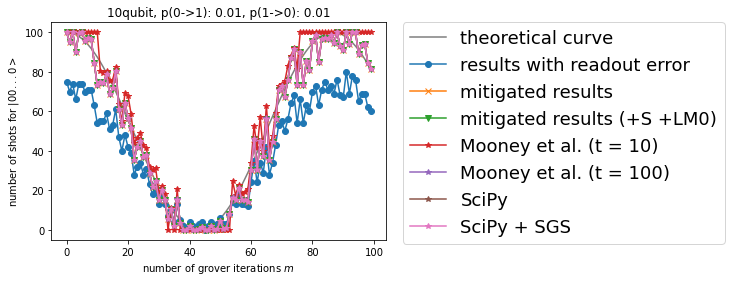

In [17]:
divide = 100
number_grover_list = [i for i in range(100)]
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         100 * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2, 
         label="theoretical curve", color="C7")
plt.plot(number_grover_list, hit_list, marker="o", label="results with readout error", color="C0")
plt.plot(number_grover_list, mit_hit_list, marker="x", label="mitigated results", color="C1")
plt.plot(number_grover_list, mit_hit_S_lm_0_list, marker="v", label="mitigated results (+S +LM0)", color="C2")
plt.plot(number_grover_list, mit_hit_mooney10_list, marker="*", label="Mooney et al. (t = 10)", color="C3")
plt.plot(number_grover_list, mit_hit_mooney100_list, marker="*", label="Mooney et al. (t = 100)", color="C4")
plt.plot(number_grover_list, mit_hit_S_SciPy_list, marker="*", label="SciPy", color="C5")
plt.plot(number_grover_list, mit_hit_S_SciPy_SGS_list, marker="*", label="SciPy + SGS", color="C6")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("10qubit, p(0->1): 0.01, p(1->0): 0.01")
plt.xlabel("number of grover iterations $m$")
plt.ylabel("number of shots for $|00...0>$")

# Afterwards

In [18]:
sin_hit_list = [100 - h for h in hit_list]
sin_mit_hit_list = [100 - h for h in mit_hit_list]
sin_mit_hit_S_lm_0_list = [100 - h for h in mit_hit_S_lm_0_list]
sin_mit_hit_mooney100_list = [100 - h for h in mit_hit_mooney100_list]
sin_mit_hit_mooney10_list = [100 - h for h in mit_hit_mooney10_list]
sin_mit_hit_S_SciPy_list = [100 - h for h in mit_hit_S_SciPy_list]
sin_mit_hit_S_SciPy_SGS_list = [100 - h for h in mit_hit_S_SciPy_SGS_list]

thetaCandidate_list = calculate_theta(
    sin_hit_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_list = calculate_theta(
    sin_mit_hit_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_lm_0_list = calculate_theta(
    sin_mit_hit_S_lm_0_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_mooney100_list = calculate_theta(
    sin_mit_hit_mooney100_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_mooney10_list = calculate_theta(
    sin_mit_hit_mooney10_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_SciPy_list = calculate_theta(
    sin_mit_hit_S_SciPy_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_SciPy_SGS_list = calculate_theta(
    sin_mit_hit_S_SciPy_SGS_list, number_grover_list, shots_list)  # list of estimated theta values

error_list = np.abs(np.sin(thetaCandidate_list)**2 - discretizedResult)  # list of estimation errors
error_mit_list = np.abs(np.sin(thetaCandidate_mit_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_lm_0_list = np.abs(np.sin(thetaCandidate_mit_S_lm_0_list)**2 - discretizedResult)  # list of estimation errors
error_mit_mooney100_list = np.abs(np.sin(thetaCandidate_mit_mooney100_list)**2 - discretizedResult)  # list of estimation errors
error_mit_mooney10_list = np.abs(np.sin(thetaCandidate_mit_mooney10_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_SciPy_list = np.abs(np.sin(thetaCandidate_mit_S_SciPy_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_SciPy_SGS_list = np.abs(np.sin(thetaCandidate_mit_S_SciPy_SGS_list)**2 - discretizedResult)  # list of estimation errors
OracleCall_list = []  # list of number of oracle calls
ErrorCramérRao_list = []  # list of Cramér-Rao lower bound
for i in range(len(number_grover_list)):
    OracleCall_list.append(
        CalcNumberOracleCalls(i, shots_list, number_grover_list))
    ErrorCramérRao_list.append(
        CalcErrorCramérRao(i, shots_list, discretizedResult, number_grover_list))

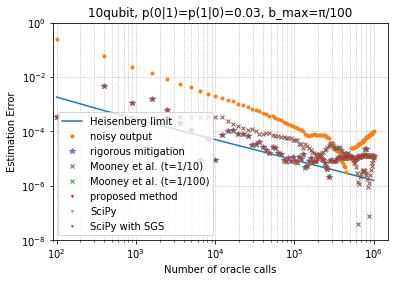

In [23]:
plt.clf()
p = plt.loglog( OracleCall_list, ErrorCramérRao_list)
p0 = plt.loglog( OracleCall_list, error_list, 'o', markersize=3)
p1 = plt.loglog( OracleCall_list, error_mit_list, '*', color='C4', markersize=6)
p2 = plt.loglog( OracleCall_list, error_mit_mooney100_list, 'x', color='C2', markersize=4)
p4 = plt.loglog( OracleCall_list, error_mit_mooney10_list, 'x', color='C5', markersize=4)
p5 = plt.loglog( OracleCall_list, error_mit_S_SciPy_list, 'v', color='C6', markersize=2)
p6 = plt.loglog( OracleCall_list, error_mit_S_SciPy_SGS_list, 'v', color='C7', markersize=2)
p3 = plt.loglog( OracleCall_list, error_mit_S_lm_0_list, 'v', color='C3', markersize=2)

plt.title("10qubit, p(0|1)=p(1|0)=0.03, b_max=π/100")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("Number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("Estimation Error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p[0], p0[0], p1[0], p4[0], p2[0], p3[0], p5[0], p6[0]), 
           ("Heisenberg limit", "noisy output", "rigorous mitigation", "Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method", "SciPy", "SciPy with SGS"))
plt.show()

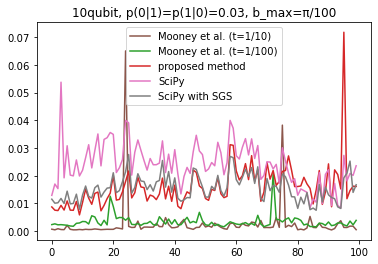

In [31]:
plt.clf()
p4 = plt.plot(ts_mooney10, color="C5")
p2 = plt.plot(ts_mooney100, color="C2")
p3 = plt.plot(ts_lm0_sgs, color="C3")
p5 = plt.plot(ts_scipy, color="C6")
p6 = plt.plot(ts_scipy_sgs, color="C7")
plt.title("10qubit, p(0|1)=p(1|0)=0.03, b_max=π/100")
plt.legend((p4[0], p2[0], p3[0], p5[0], p6[0]),
           ("Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method", "SciPy", "SciPy with SGS"))
plt.show()